In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


In [10]:
stock_returns = pd.read_csv('./small_portfolio.csv', parse_dates=True, index_col='date')
stock_returns.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,25.06,62.49,46.760,90.44
2015-01-05,24.60,60.55,46.325,90.01
2015-01-06,24.07,58.98,45.650,89.60
2015-01-07,24.08,59.07,46.230,90.07
2015-01-08,24.37,60.39,47.590,91.10


In [13]:
# create a new dataframe with the transformed data
new_df = pd.DataFrame(index=stock_returns.index)
for col in stock_returns.columns:
    new_df[col] = stock_returns[col] / stock_returns.iloc[0][col]
new_df['portfolio'] = new_df.mean(axis=1)

In [16]:
stock_returns = new_df.copy()

In [17]:
def plot_pct_returns(df):
    fig, ax = plt.subplots()
    ax.plot(df.index, df.MSFT, marker='', color='green', linewidth=2, label="MSFT")
    ax.plot(df.index, df.portfolio, linewidth=2, linestyle='dashed', color='skyblue', label='portfolio')
    ax.plot(df.index, df.PG, marker='', color='pink', linewidth=2, label="PG")
    ax.plot(df.index, df.JPM, color='yellow', linewidth=2, label='JPM')
    ax.plot(df.index, df.GE, color='red', linewidth=2, label='GE')
    ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
    #ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((1,4,7,10)))
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
    #ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
    plt.legend()
    plt.show()

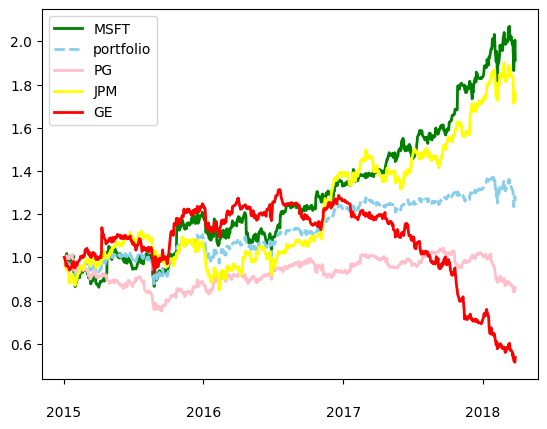

In [18]:
# Check beginning and end of dataset
stock_returns.head()
stock_returns.tail()

# Plot percentage returns
plot_pct_returns(stock_returns)

In [20]:
data = pd.read_csv('./small_portfolio.csv', parse_dates=True, index_col='date')

In [21]:
# Calculate percentage returns
returns = data.pct_change()

# Calculate individual mean returns 
meanDailyReturns = returns.mean()

# Define weights for the portfolio
weights = np.array([0.5, 0.2, 0.2, 0.1])

# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

# Print the portfolio return
print(portReturn)

-1.6782226618545438e-05


In [26]:
returns = data.pct_change()

# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)

# Calculate cumulative returns
daily_cum_ret = (1+returns).cumprod()
daily_cum_ret

,GE,JPM,MSFT,PG,Portfolio
date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.981644,0.968955,0.990697,0.995245,0.982277
2015-01-06,0.960495,0.943831,0.976262,0.990712,0.963292
2015-01-07,0.960894,0.945271,0.988666,0.995909,0.966739
2015-01-08,0.972466,0.966395,1.017750,1.007298,0.983674
...,...,...,...,...,...
2018-03-21,0.553871,1.836134,1.977759,0.851835,0.974287
2018-03-22,0.532721,1.759482,1.920231,0.844870,0.941086
2018-03-23,0.521548,1.712434,1.864414,0.839341,0.920097


In [28]:
# # Create portfolio returns column
# returns['Portfolio'] = returns.dot(weights)

# # Calculate cumulative returns
# daily_cum_ret = (1 + returns).cumprod()
print(daily_cum_ret.tail())

                  GE       JPM      MSFT        PG  Portfolio
date                                                         
2018-03-21  0.553871  1.836134  1.977759  0.851835   0.974287
2018-03-22  0.532721  1.759482  1.920231  0.844870   0.941086
2018-03-23  0.521548  1.712434  1.864414  0.839341   0.920097
2018-03-26  0.514366  1.765242  2.005560  0.844870   0.933974
2018-03-27  0.536313  1.730997  1.913388  0.860128   0.943378


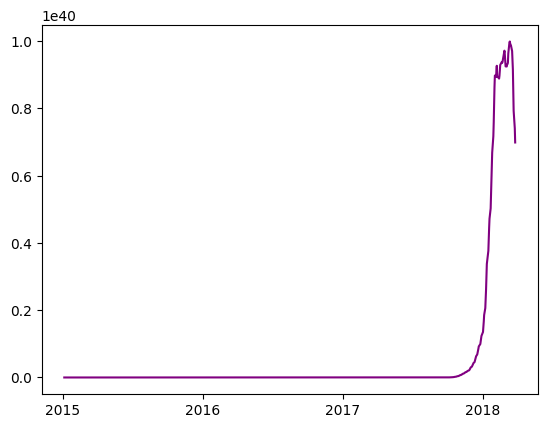

In [29]:
# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio.cumprod(), color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator()) 

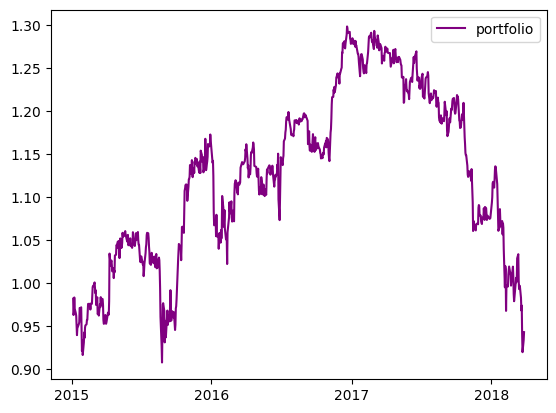

In [31]:
# Create portfolio returns column
# returns['Portfolio']= returns.dot(weights)

# # Calculate cumulative returns
# daily_cum_ret=(1+returns).cumprod()

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

In [32]:
# Get percentage daily returns
daily_returns = data.pct_change()

# Assign portfolio weights
weights = np.array([0.05, 0.4, 0.3, 0.25])

In [34]:
# Get percentage daily returns
daily_returns = data.pct_change()

# Assign portfolio weights
weights = np.array([0.05, 0.4, 0.3, 0.25])

# Calculate the covariance matrix 
cov_matrix = (daily_returns.cov())*250
print (cov_matrix)

            GE       JPM      MSFT        PG
GE    0.045987  0.022828  0.016285  0.010101
JPM   0.022828  0.046660  0.024135  0.010812
MSFT  0.016285  0.024135  0.054054  0.014144
PG    0.010101  0.010812  0.014144  0.020645


In [35]:
# Get percentage daily returns
daily_returns = data.pct_change()

# Assign portfolio weights
weights = np.array([0.05, 0.4, 0.3, 0.25])

# Calculate the covariance matrix 
cov_matrix = (daily_returns.cov()) * 250

# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

2.55%


In [36]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

15.959999999999999%


Good job! The standard deviation tells you how much the portfolio's return can deviate from the mean historical return. If a portfolio has a 12% average rate of return and a standard deviation of 4%, its return will range from 8-16%. The mean historic return of this particular portfolio is actually close to zero. With an average standard deviation of roughly 16%, this means you're getting a bad deal here! Now that you've learned how to calculate basic risk and return of a portfolio, you're ready to dive deeper into the world of portfolio analysis in the next chapters.